In [1]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [2]:
import numpy as np
import pandas as pd

In [3]:
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [4]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func, inspect

In [5]:
engine = create_engine("sqlite:///hawaii.sqlite")

In [6]:
# reflect an existing database into a new model
Base=automap_base()
# reflect the tables
Base.prepare(engine,reflect=True)

In [7]:
# We can view all of the classes that automap found
Base.classes.keys()

['measurement', 'station']

In [8]:
# Save references to each table
Measurement = Base.classes.measurement
Station = Base.classes.station

In [9]:
# Create our session (link) from Python to the DB
session = Session(engine)

# Exploratory Climate Analysis

(array([-500.,    0.,  500., 1000., 1500., 2000., 2500.]),
 <a list of 7 Text xticklabel objects>)

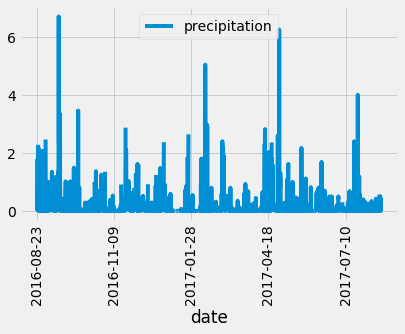

In [38]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results. 
#Starting from the last data point in the database. 
# prev_year = dt.date(2017, 8, 23)

# Calculate the date one year from the last date in data set.
prev_year=dt.date(2017,8,23)-dt.timedelta(days=365)

# Perform a query to retrieve the data and precipitation scores 
results=[]
results=session.query(Measurement.date,Measurement.prcp).filter(Measurement.date >= prev_year).all()
# print(results)

# Save the query results as a Pandas DataFrame and set the index to the date column
df = pd.DataFrame(results, columns=['date','precipitation'])
df.set_index(df['date'],inplace=True)
# Sort the dataframe by date
df = df.sort_index() 
df2=df.to_string(index=False)
# Use Pandas Plotting with Matplotlib to plot the data
df.plot()
plt.tight_layout()
plt.xticks(rotation=90)

In [11]:
# Use Pandas to calcualte the summary statistics for the precipitation data
df.describe()

,precipitation
count,2021.000000
mean,0.177279
std,0.461190
min,0.000000
25%,0.000000
50%,0.020000
75%,0.130000
max,6.700000


In [12]:
# How many stations are available in this dataset?
session.query(func.count(Station.station)).all()

[(9)]

In [13]:
# What are the most active stations?
# List the stations and the counts in descending order.
session.query(Measurement.station, func.count(Measurement.station)).\
group_by(Measurement.station).order_by(func.count(Measurement.station).desc()).all()

[('USC00519281', 2772),
 ('USC00519397', 2724),
 ('USC00513117', 2709),
 ('USC00519523', 2669),
 ('USC00516128', 2612),
 ('USC00514830', 2202),
 ('USC00511918', 1979),
 ('USC00517948', 1372),
 ('USC00518838', 511)]

In [14]:
# Using the station id from the previous query, calculate the lowest temperature recorded, 
# highest temperature recorded, and average temperature most active station?
session.query(func.min(Measurement.tobs), func.max(Measurement.tobs), func.avg(Measurement.tobs)).\
filter(Measurement.station == 'USC00519281').all()

[(54.0, 85.0, 71.66378066378067)]

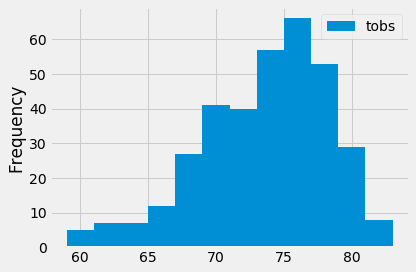

In [15]:
# Choose the station with the highest number of temperature observations.
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram
results = session.query(Measurement.tobs).\
filter(Measurement.station == 'USC00519281').\
filter(Measurement.date >= prev_year).all()
df = pd.DataFrame(results, columns=['tobs'])
df.plot.hist(bins=12)
plt.tight_layout()

In [16]:
# Write a function called `calc_temps` that will accept start date and end date in the format '%Y-%m-%d' 
# and return the minimum, average, and maximum temperatures for that range of dates


# Challenge

# Seasonal data needed 
#gather data on seasons of Oahu and determine whether seasons could affter the surf and ice cream shop business
#Are there times of year where business is slower, or customers are different?

#Key stat data on June 
#Key stat data on December
#Compare
#Make 2 or 3 recommendations for further analysis

#Deliverables:
#Identify key statistical data in June across all stations and years using describe()
#Identify key statistical data in December across all stations and years using describe()


In [17]:
#finding out what columns are needed from both databases
inspector=inspect(engine)
inspector.get_table_names()

['measurement', 'station']

In [27]:
#columns in measurement 
columns=inspector.get_columns('measurement')
for i in columns:
    print(i['name'], i["type"])
#we can use this database only

id INTEGER
station TEXT
date TEXT
prcp FLOAT
tobs FLOAT


In [29]:
#columns in station
columns=inspector.get_columns('station')
for j in columns:
    print(j['name'], j["type"])

id INTEGER
station TEXT
name TEXT
latitude FLOAT
longitude FLOAT
elevation FLOAT


Text(0.5, 1, 'Precipitation and Temperatures in June')

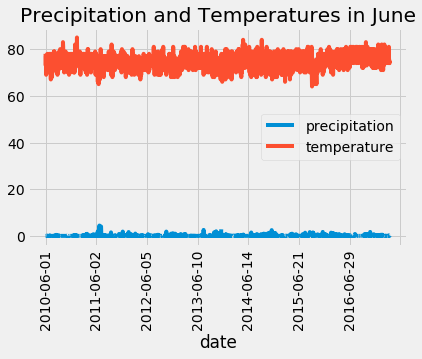

In [37]:
#gathering the statistical data for june
#making a sel variable to select data from date, precipation and temperature columns
#making a session query to look through for the month of June across all years/stations
def monthly_stats(date):
    sel=[Measurement.date,Measurement.prcp, Measurement.tobs]
    return session.query(*sel).filter(func.strftime("%m",Measurement.date)==date).all()

june_data=monthly_stats("06")
# print(june_data)
#Making results into a dataframe and plotting 
june_data_df = pd.DataFrame(june_data, columns=['date','precipitation','temperature'])
june_data_df.set_index(june_data_df['date'],inplace=True)
june_data_df = june_data_df.sort_index() 
june_data_df2=june_data_df.to_string(index=False)
june_data_df.plot()
plt.tight_layout()
plt.xticks(rotation=90)
plt.title("Precipitation and Temperatures in June")
plt.xaxis()

In [26]:
#describe the june data 
june_data_df.describe()

,precipitation,temperature
count,1574.000000,1700.000000
mean,0.136360,74.944118
std,0.335731,3.257417
min,0.000000,64.000000
25%,0.000000,73.000000
50%,0.020000,75.000000
75%,0.120000,77.000000
max,4.430000,85.000000


Text(0.5, 1, 'Precipitation and Temperatures in December')

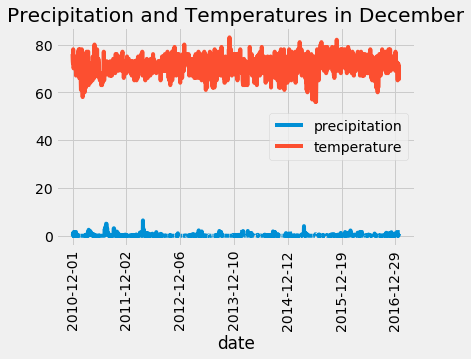

In [36]:
#gathering the statistical data for December
#making a sel variable to select data from date, precipation and temperature columns
#making a session query to look through for the month of December across all years/stations
def monthly_stats(date):
    sel=[Measurement.date,Measurement.prcp,Measurement.tobs]
    return session.query(*sel).filter(func.strftime("%m",Measurement.date)==date).all()

december_data=monthly_stats("12")
# print(december_data)
#Making results into a dataframe and plotting 
december_data_df = pd.DataFrame(december_data, columns=['date','precipitation','temperature'])
december_data_df.set_index(december_data_df['date'],inplace=True)
december_data_df = december_data_df.sort_index() 
december_data_df2=december_data_df.to_string(index=False)
december_data_df.plot()
plt.tight_layout()
plt.xticks(rotation=90)
plt.title("Precipitation and Temperatures in December")

In [31]:
#using describe on the december data
december_data_df.describe()

,precipitation,temperature
count,1405.000000,1517.000000
mean,0.216819,71.041529
std,0.541399,3.745920
min,0.000000,56.000000
25%,0.000000,69.000000
50%,0.030000,71.000000
75%,0.150000,74.000000
max,6.420000,83.000000
